# Regresión de edad/ganancia en sklearn

El objetivo de este código es ejempificar el uso de Sklearn Regression.

In [1]:
import numpy as np
import random

def ageNetWorthData():
    random.seed(42)
    np.random.seed(42)

    ages = []
    for ii in range(100):
        ages.append( random.randint(20,65) )
    net_worths = [ii * 6.25 + np.random.normal(scale=40.) for ii in ages]
    ### need massage list into a 2d numpy array to get it to work in LinearRegression
    ages       = np.reshape( np.array(ages), (len(ages), 1))
    net_worths = np.reshape( np.array(net_worths), (len(net_worths), 1))

    from sklearn.model_selection import train_test_split
    ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)

    return ages_train, ages_test, net_worths_train, net_worths_test

## Entrenar el modelo de regresión y graficar

In [2]:
import matplotlib
from sklearn.linear_model import LinearRegression
matplotlib.use('agg')
import matplotlib.pyplot as plt

ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()

# crear y entrenar la regresión
reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

plt.clf()
plt.scatter(ages_train, net_worths_train, color="b", label="train data")
plt.scatter(ages_test, net_worths_test, color="r", label="test data")
plt.plot(ages_test, reg.predict(ages_test), color="black")
plt.legend(loc=2)
plt.xlabel("Edad")
plt.ylabel("Ganancias")
plt.legend(loc="upper left")
plt.title("Edad vs. Ganancia")
plt.grid(True)
plt.savefig("age_vs_net_worth.png")
plt.show()

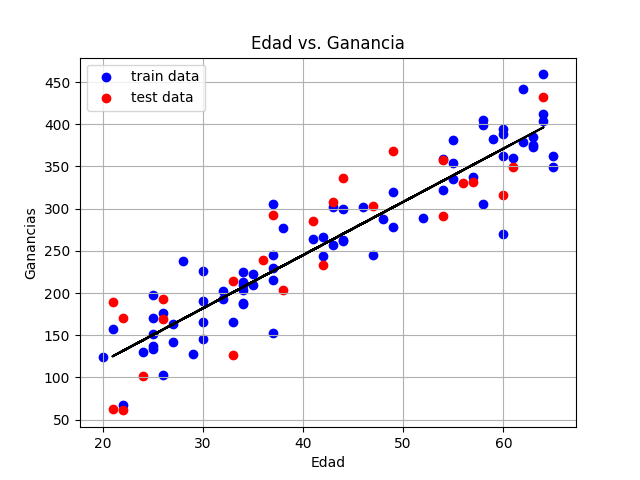

In [3]:
from IPython.display import Image
Image(filename='age_vs_net_worth.png')

## Extrayendo información

In [4]:
# Predecir el Net Worth de una persona de 30 años de edad
age_to_predict = np.array([[30]])  # Convertir la edad a un array 2D
predicted_net_worth = reg.predict(age_to_predict)

# Obtener los coeficientes de la regresión lineal
slope = reg.coef_[0]
intercept = reg.intercept_

# Calcular el coeficiente de determinación R^2 para los datos de entrenamiento
r_squared_train = reg.score(ages_train, net_worths_train)

# Calcular el coeficiente de determinación R^2 para la predicción
r_squared_prediction = reg.score(ages_test, net_worths_test)

# Mostrar resultados
print(f"Predicción del Ganancia para una persona de 30 años: ${predicted_net_worth[0][0]:,.2f}")
print(f"Slope (Coeficiente de pendiente): {slope[0]:.2f}")
print(f"Intercept (Intersección): {intercept[0]:.2f}")
print(f"R^2 para datos de entrenamiento: {r_squared_train:.2f}")
print(f"R^2 para datos de test: {r_squared_prediction:.2f}")

Predicción del Ganancia para una persona de 30 años: $181.84
Slope (Coeficiente de pendiente): 6.31
Intercept (Intersección): -7.45
R^2 para datos de entrenamiento: 0.88
R^2 para datos de test: 0.79
